In [1]:
# Load libraries
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from pandas import set_option
from matplotlib import pyplot
import numpy  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load data

In [2]:
# Load data 
url = "https://raw.githubusercontent.com/ricardo-rios/topicos_ciencia_datos/master/ejercicios/ejercicio0001/datos.csv"
data = read_csv(url, header=0)

In [3]:
# We print the numbers of rows and columns
print(data.shape)

(100000, 26)


In [4]:
# We take a sneak peek to the data
peek = data.head(20)
print(peek)

           X1         X2         X3  ...        X24        X25  Y
0   74.210269  77.986411  89.128194  ...  80.440721  80.883145  0
1   73.154330  77.559074  74.844036  ...  76.320864  83.188503  1
2   80.051855  89.762222  78.233780  ...  78.126515  86.253543  0
3   75.253554  80.800038  74.991073  ...  79.376889  80.443944  1
4   81.903759  77.241719  78.697315  ...  81.093220  82.897905  0
5   77.240152  76.606884  82.237819  ...  79.829565  78.895578  0
6   81.432709  82.924548  79.532566  ...  76.303128  79.866099  0
7   87.773530  82.909124  76.085159  ...  83.069238  82.712907  1
8   77.255547  80.302357  84.370235  ...  78.461434  86.385326  0
9   81.107749  73.011044  79.958893  ...  80.802315  77.840632  1
10  79.494913  84.086968  79.728179  ...  80.080405  78.972943  0
11  80.393117  82.976990  82.873770  ...  81.227227  83.698915  0
12  82.511669  78.413373  76.148201  ...  83.113030  77.904520  1
13  83.566916  78.129726  72.528989  ...  82.825027  77.374554  0
14  71.795

In [5]:
# Data types for each attribute 
types = data.dtypes
print(types)

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
X24    float64
X25    float64
Y        int64
dtype: object


# Descriptive statistics

In [6]:
# Statistical summary 
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print(description)

               X1          X2          X3  ...         X24         X25         Y
count  100000.000  100000.000  100000.000  ...  100000.000  100000.000  100000.0
mean       79.995      79.992      79.977  ...      79.990      80.010       0.5
std         3.990       3.983       4.006  ...       3.999       4.008       0.5
min        62.772      61.704      63.310  ...      60.754      63.523       0.0
25%        77.305      77.299      77.278  ...      77.289      77.304       0.0
50%        79.990      79.997      79.962  ...      79.988      80.012       0.0
75%        82.685      82.687      82.682  ...      82.688      82.733       1.0
max        96.920      97.380      96.593  ...      98.362      96.339       1.0

[8 rows x 26 columns]


In [7]:
# Class distribution
class_counts = data.groupby('Y').size()
print(class_counts)

Y
0    50010
1    49990
dtype: int64


In [8]:
# Pariwise Pearson Correlation
correlations = data.corr(method='pearson')
print(correlations)

            X1         X2         X3  ...        X24        X25          Y
X1   1.000e+00 -2.358e-03  9.833e-04  ... -3.426e-04  8.426e-04  7.199e-03
X2  -2.358e-03  1.000e+00 -3.286e-03  ...  6.170e-04 -1.750e-04  2.701e-03
X3   9.833e-04 -3.286e-03  1.000e+00  ... -2.204e-03  5.790e-04 -3.459e-03
X4  -3.545e-03  3.728e-04 -5.709e-04  ... -5.342e-03 -1.168e-03 -6.336e-01
X5  -4.031e-03  6.114e-04  9.659e-04  ... -3.034e-03  2.438e-03  5.558e-04
X6   1.708e-04  2.491e-03 -1.132e-03  ... -2.603e-03  5.663e-04  1.298e-03
X7   2.835e-03 -3.474e-03  3.609e-03  ... -2.763e-03 -5.191e-03  2.768e-04
X8   1.063e-03  2.234e-03 -5.209e-03  ...  3.106e-04 -4.752e-03  4.234e-04
X9   3.792e-03 -6.357e-03 -2.887e-03  ...  9.727e-03 -4.685e-03  2.328e-03
X10 -1.831e-03  1.322e-03 -6.640e-03  ...  4.873e-03 -2.304e-03 -2.301e-03
X11  3.100e-03  3.588e-03  1.615e-03  ... -6.023e-03  6.010e-03  3.069e-03
X12  5.878e-03  2.034e-03 -3.780e-04  ...  4.906e-03 -1.185e-03  5.379e-03
X13 -2.204e-03  1.502e-03

In [9]:
# Skew for each attribute 
skew = data.skew()
print(skew)

X1    -2.170e-03
X2    -1.290e-03
X3     5.460e-03
X4     2.117e-01
X5    -6.233e-03
X6    -3.166e-03
X7    -8.141e-03
X8    -8.789e-03
X9    -1.442e-03
X10    6.174e-03
X11   -1.081e-01
X12    4.152e-03
X13    4.644e-01
X14    1.841e-03
X15   -1.928e-01
X16    9.230e-02
X17    7.598e-03
X18    3.237e-03
X19   -7.101e-02
X20   -1.593e-02
X21    3.328e-04
X22   -9.313e-03
X23   -9.066e-03
X24   -2.607e-03
X25   -4.526e-03
Y      4.000e-04
dtype: float64


# Visualizations

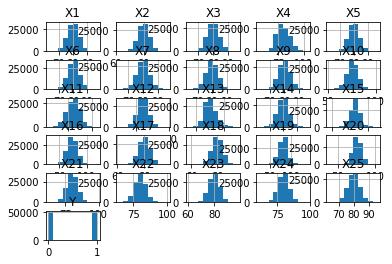

In [10]:
# Univariate histogram
data.hist()
pyplot.show()

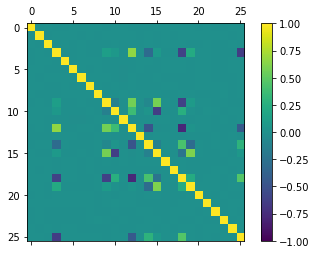

In [11]:
# Univariate density plots 
correlations = data.corr()
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

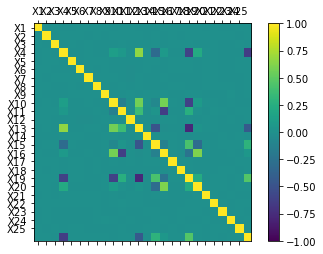

In [12]:
# Correlation matrix 
correlations = data.corr()
names = list(data.columns)
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,25,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

# Making the pipeline 

In [13]:
array = data.values
print(array.shape)
X = array[:,0:25]
Y = array[:,25]

(100000, 26)


In [14]:
# create the pipeline 
# create pipeline
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
rf = RandomForestClassifier(random_state = 1) # random state is for reproducibility purposes.
estimators.append(('rf' , rf))
model = Pipeline(estimators)

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())